<a href="https://colab.research.google.com/github/lukaszplust/ML_and_DL_projects/blob/main/SVM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
%cd /content/drive/MyDrive/CardDetectionProject/

/content/drive/MyDrive/CardDetectionProject


In [5]:
!ls

creditcard.csv


In [6]:
data = pd.read_csv("creditcard.csv")

In [7]:
data.shape

(284807, 31)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
#data.isnull().sum()

In [12]:
data["Class"].value_counts()

,count
Class,
0,284315
1,492


In [13]:
data["Amount"].value_counts()

,count
Amount,
1.00,13688
1.98,6044
0.89,4872
9.99,4747
15.00,3280
...,...
202.24,1
252.85,1
615.52,1


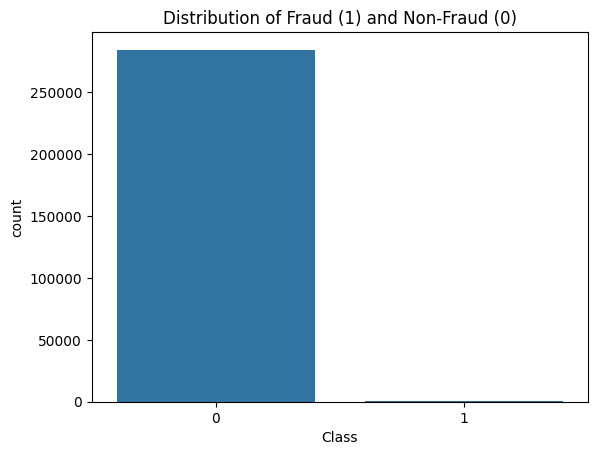

In [14]:
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraud (1) and Non-Fraud (0)')
plt.show()

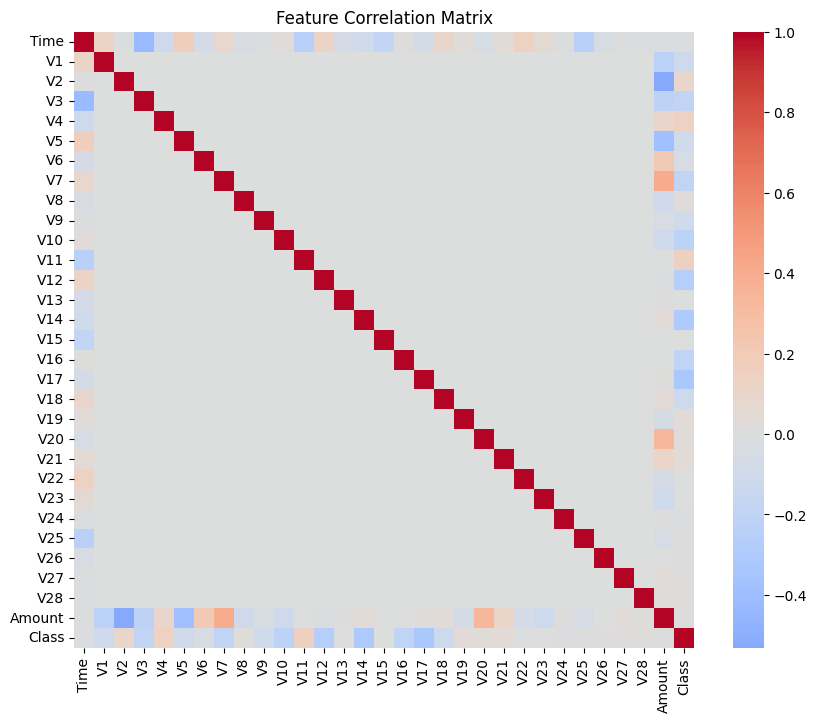

In [15]:
# correlation
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

Preparing data to the model

In [16]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [17]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [18]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


Scaling the data

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Now I have a lot of non fraud detection (class = 1) comparing to class = 0 (Fraud Detection), so i need to do SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) to metoda, która sztucznie powiększa zbiór danych klasy mniejszościowej (czyli fraudów tutaj)

Zamiast kopiować istniejące próbki, SMOTE tworzy nowe przykłady na podstawie istniejących

Dla każdego punktu x_i z klasy mniejszościowej:

Znajduje k najbliższych sąsiadów tej samej klasy (domyślnie k=5).

Losuje jednego z tych sąsiadów, np. x_j.

Tworzy nowy punkt: xnew​=xi​+rand(0,1)×(xj​−xi​), czyli punkt między nimi w przestrzeni cech

Zastosowałem SMOTE tylko na zbiorze treningowym, żeby uniknąć data leakage. Dzięki temu model SVM uczy się rozpoznawać fraudy na zrównoważonych danych, ale testuję go na realnych, niezrównoważonych przypadkach, co daje wiarygodne metryki.

In [22]:
sm = SMOTE(random_state=42)
# fit — uczy się, które punkty należą do klasy mniejszościowej (np. fraud)
# resample — tworzy nowe punkty (rekordy) klasy mniejszościowej tak, żeby liczba próbek obu klas się wyrównała
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [23]:
# before SMOTE
y_train.value_counts()

,count
Class,
0,227451
1,394


In [24]:
pd.Series(y_train_res.value_counts())

,count
Class,
0,227451
1,227451


Training the model

In order to efficiently train a Support Vector Machine (SVM) on the large, balanced dataset obtained after applying SMOTE, I employed the SGDClassifier from scikit-learn with the hinge loss function.

The hinge loss corresponds to a linear SVM, but unlike the standard SVC implementation, SGDClassifier uses stochastic gradient descent, making it scalable to large datasets.

I set max_iter=1000 and tol=1e-3 to control the number of iterations and convergence tolerance, and random_state=42 to ensure reproducibility.

The classifier was trained on the SMOTE-resampled training set, which balances the minority (fraud) and majority (normal) classes, allowing the model to learn a more robust decision boundary.

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
sgd_svm.fit(X_train_res, y_train_res)

SGDClassifier(random_state=42)

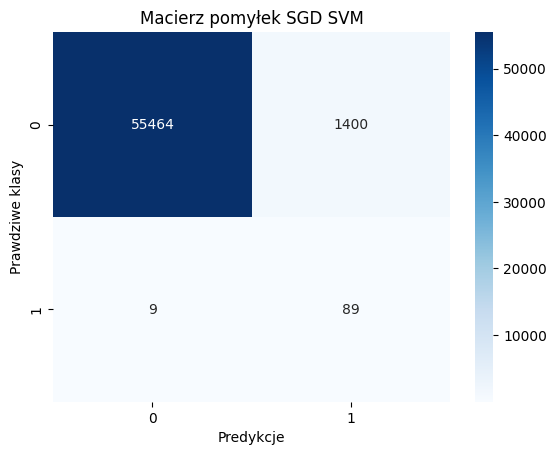

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



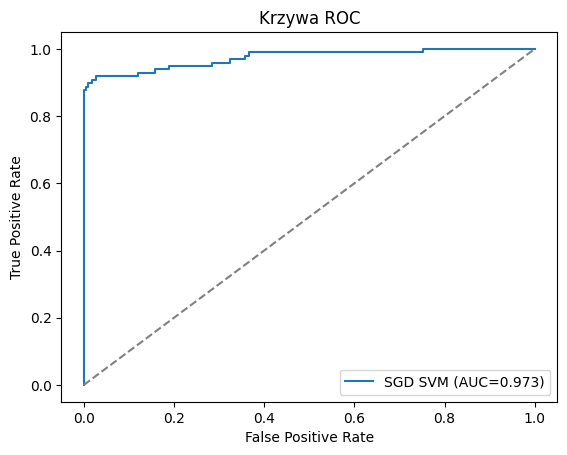

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# predykcje na oryginalnym X_test
y_pred = sgd_svm.predict(X_test)

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe klasy')
plt.title('Macierz pomyłek SGD SVM')
plt.show()

# raport klasyfikacji
print(classification_report(y_test, y_pred))

# ROC-AUC
y_score = sgd_svm.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, label=f'SGD SVM (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log']
}

grid = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid.fit(X_train_res, y_train_res)

print("Najlepsze parametry:", grid.best_params_)
best_sgd = grid.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Najlepsze parametry: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


After hyperparameter tuning with GridSearchCV, the best configuration was found to be:
alpha=0.0001, penalty='l1', loss='hinge', max_iter=1000.

This corresponds to a linear SVM trained via stochastic gradient descent with L1 regularization, resulting in sparse feature weights and improved interpretability.

The model was evaluated on the test set using precision, recall, F1-score, and ROC-AUC metrics, achieving robust fraud detection performance.

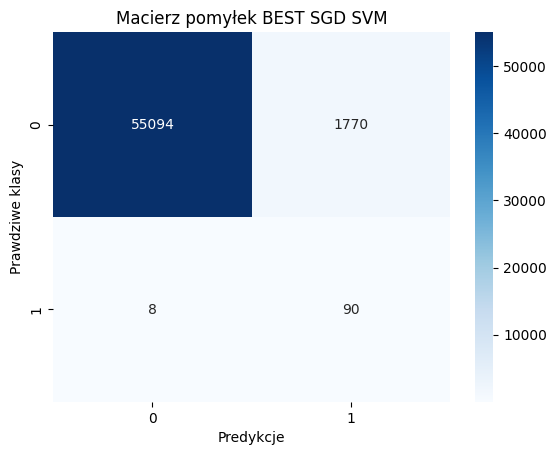

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



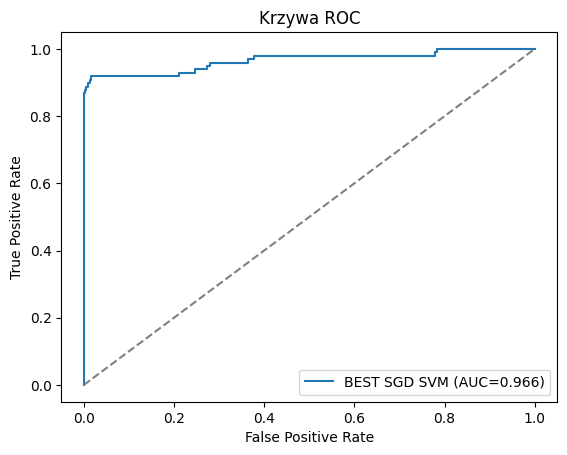

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# predykcje na zbiorze testowym najlepszego modelu
y_pred = best_sgd.predict(X_test)

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe klasy')
plt.title('Macierz pomyłek BEST SGD SVM')
plt.show()

# raport klasyfikacji
print(classification_report(y_test, y_pred))

# ROC-AUC
y_score = best_sgd.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, label=f'BEST SGD SVM (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend()
plt.show()

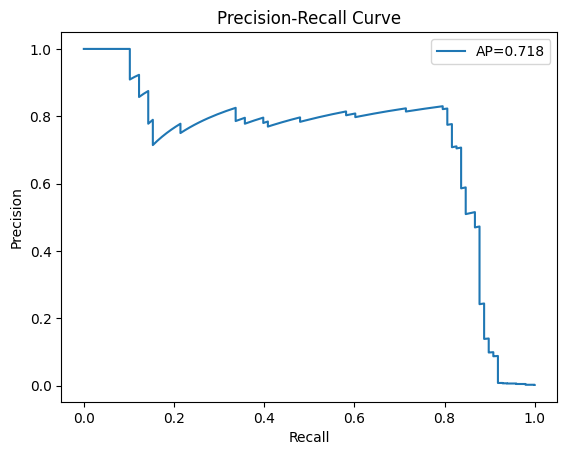

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_score = best_sgd.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)

plt.plot(recall, precision, label=f'AP={ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

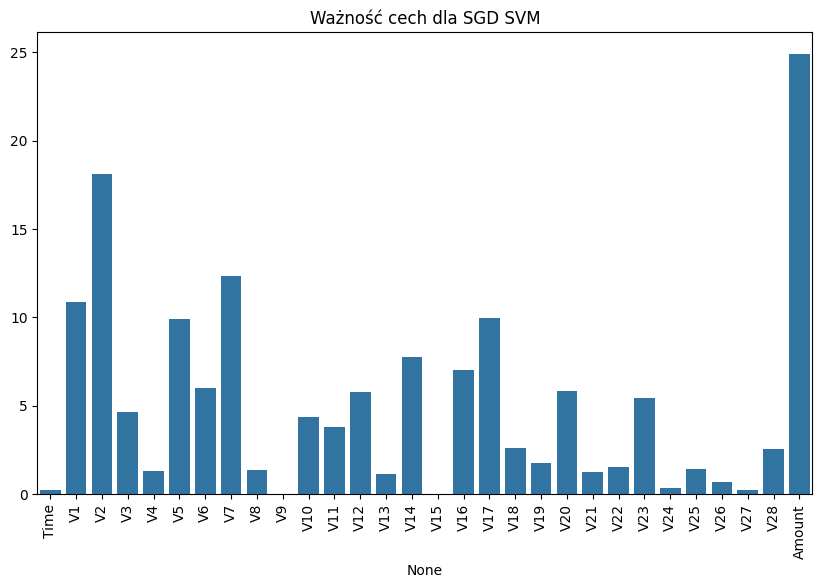

In [30]:
feature_importance = np.abs(best_sgd.coef_[0])
feat_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feat_names, y=feature_importance)
plt.xticks(rotation=90)
plt.title("Ważność cech dla SGD SVM")
plt.show()

In [31]:
import joblib
joblib.dump(best_sgd, 'best_svm_model.pkl')

['best_svm_model.pkl']

In [39]:
# wybieram losową próbkę z test setu
idx = np.random.randint(0, X_test.shape[0])
new_sample = X_test[idx].reshape(1, -1)
# przewiduje etykietę (klasę) dla tej próbki
# 0 - normal transaction
# 1 - fraud
prediction = best_sgd.predict(new_sample)
print(f'Prediction: {prediction}')

true_label = y_test.iloc[idx]
print(f'True Label: {true_label}')

Prediction: [0]
True Label: 0


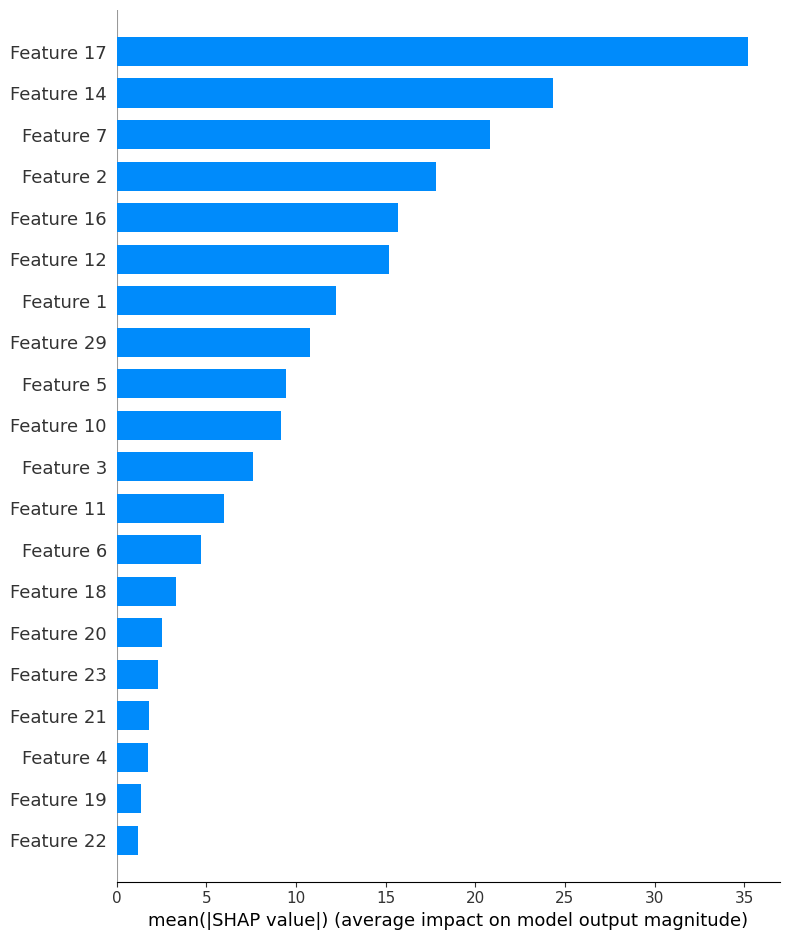

In [40]:
import shap

explainer = shap.Explainer(best_sgd, X_train_res)
shap_values = explainer(X_test[:100])

shap.summary_plot(shap_values, X_test, plot_type="bar")